**Dataset Link:** https://www.kaggle.com/competitions/dogs-vs-cats/data

### Here, I am going to use Mobile Net pre-trained model

Pre-train-model-link: https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4

In [1]:
# To fetch dataset from kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Kaggle Dataset API Command

!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Check the directory

!ls

dogs-vs-cats.zip  model.png   sample_data	    test1.zip  train.zip
kaggle.json	  resizedImg  sampleSubmission.csv  train


In [4]:
# To unzip file

import zipfile

zip_ref = zipfile.ZipFile(file="/content/dogs-vs-cats.zip", mode='r')
zip_ref.extractall(path='/content')
zip_ref.close()

In [5]:
# extracting the compressed dataset

dataset = '/content/train.zip'

with zipfile.ZipFile(file=dataset, mode='r') as zip:
  zip.extractall(path="/content")
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# Counting the number of files in training folder

import os

path, dir, files = next(os.walk("/content/train"))

print(path)
print(dir)
print("total file count: ", len(files))

/content/train
[]
total file count:  25000


In [7]:
# Here, cat and dog image in togather. so, we have to manage it

print(os.listdir(path="/content/train"))

['cat.660.jpg', 'cat.9295.jpg', 'dog.2906.jpg', 'dog.10319.jpg', 'cat.4195.jpg', 'cat.3263.jpg', 'cat.4447.jpg', 'cat.201.jpg', 'cat.5647.jpg', 'dog.3634.jpg', 'cat.6433.jpg', 'cat.6471.jpg', 'cat.9060.jpg', 'dog.3982.jpg', 'cat.11448.jpg', 'dog.11012.jpg', 'dog.10919.jpg', 'cat.11582.jpg', 'cat.1427.jpg', 'dog.5715.jpg', 'dog.10771.jpg', 'cat.1285.jpg', 'dog.10870.jpg', 'cat.2897.jpg', 'cat.10850.jpg', 'dog.2000.jpg', 'cat.3876.jpg', 'dog.1684.jpg', 'cat.3226.jpg', 'cat.6530.jpg', 'dog.1866.jpg', 'cat.7230.jpg', 'dog.9964.jpg', 'dog.6990.jpg', 'dog.4082.jpg', 'dog.11029.jpg', 'dog.8570.jpg', 'dog.5700.jpg', 'cat.1511.jpg', 'cat.12099.jpg', 'cat.7908.jpg', 'cat.12042.jpg', 'cat.7228.jpg', 'cat.11351.jpg', 'cat.9215.jpg', 'cat.1682.jpg', 'cat.4543.jpg', 'cat.3989.jpg', 'cat.9228.jpg', 'dog.5985.jpg', 'dog.7694.jpg', 'cat.12118.jpg', 'cat.1914.jpg', 'cat.7072.jpg', 'cat.3923.jpg', 'dog.5778.jpg', 'dog.6634.jpg', 'cat.3528.jpg', 'dog.2294.jpg', 'dog.9256.jpg', 'dog.1376.jpg', 'dog.4651.jp

In [8]:
# Import necessary library

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2
import glob

import tensorflow as tf
import tensorflow_hub as hub

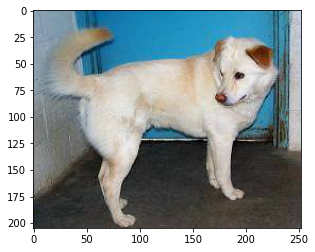

In [9]:
# Display the dog image

img = mpimg.imread(fname="/content/train/dog.2906.jpg")
plt.imshow(img)
plt.show()

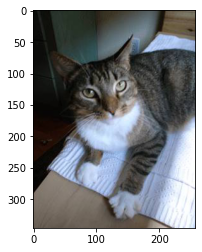

In [10]:
# Display the cat image

img = mpimg.imread(fname="/content/train/cat.660.jpg")
plt.imshow(img)
plt.show()

In [11]:
# Demo test

all_images = os.listdir(path="/content/train")

flag = 1

for i in all_images:
    if flag == 5:
        break
    else:
        print(i[0:3])
        flag += 1
    

cat
cat
dog
dog


In [12]:
# Since here dog and cat image have mix form. Let's count how many dog image and how many cats image there.

total_dog_images = len([x for x in all_images if x[0:3] == "dog"])
total_cat_images = len([x for x in all_images if x[0:3] == "cat"])

print(f"total dog images: {total_dog_images}")
print(f"total dog images: {total_cat_images}")

total dog images: 12500
total dog images: 12500


### Our model take 224 * 224 size image. since our images is not the same size. So, we have to resize all images.

In [24]:
# Here we will not train all the images. We will take total 2000 images.

current_image_path = "/content/train/"
resized_image_path = "/content/resized_image/"



for i in range(2000):
    img_name = os.listdir(path=current_image_path)[i]
    actual_img = cv2.imread(filename=current_image_path + img_name)
    resized_img = cv2.resize(src=actual_img, dsize=(224,224))

    new_path = resized_image_path + img_name

    cv2.imwrite(filename=new_path, img=resized_img)

In [25]:
print(resized_image_path + os.listdir(path=current_image_path)[0])

/content/resized_image/cat.660.jpg


In [26]:
!ls

dogs-vs-cats.zip  model.png	 resizedImg   sampleSubmission.csv  train
kaggle.json	  resized_image  sample_data  test1.zip		    train.zip


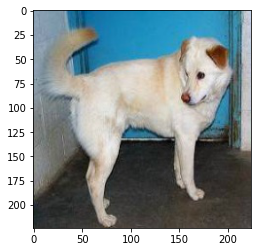

In [27]:
# display resize dog image

img = mpimg.imread(fname="/content/resizedImg/dog.2906.jpg")
plt.imshow(img)
plt.show()

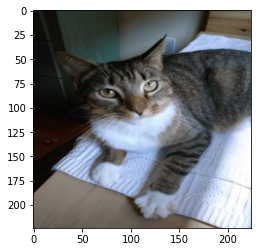

In [28]:
# display resize cat image

img = mpimg.imread(fname="/content/resizedImg/cat.660.jpg")
plt.imshow(img)
plt.show()

In [29]:
# Let's create labels for our classes

# Dog -- 1
# Cat -- 0

image_path = "/content/resized_image"

class_labels = []

for i in os.listdir(path=image_path):
    if i[0:3] == "dog":
        class_labels.append(1)
    elif i[0:3] == 'cat':
        class_labels.append(0)

In [31]:
print(len(os.listdir(image_path)))

2000


In [30]:
class_labels[0:5]

[0, 0, 1, 1, 0]

In [32]:
os.listdir(path=image_path)[0:5]

['cat.660.jpg',
 'cat.9295.jpg',
 'dog.2906.jpg',
 'dog.10319.jpg',
 'cat.4195.jpg']

In [33]:
# Let's check the number of dog and cat image

values, counts = np.unique(ar=class_labels, return_counts=True)

print(values)
print(counts)

[0 1]
[1035  965]


**The number of cats image: 1035**

**The number of dogs image: 965**

In [34]:
# convert all images into numpy array
# We will also check is their any png image or not and all image path in a list

image_directory = '/content/resized_image/'

image_extension = ['png', 'jpg']

all_files = []

[all_files.extend(glob.glob(pathname=image_directory + "*." + extension)) for extension in image_extension]

[None, None]

In [35]:
all_files[0:10]

['/content/resized_image/cat.660.jpg',
 '/content/resized_image/cat.9295.jpg',
 '/content/resized_image/dog.2906.jpg',
 '/content/resized_image/dog.10319.jpg',
 '/content/resized_image/cat.4195.jpg',
 '/content/resized_image/cat.3263.jpg',
 '/content/resized_image/cat.4447.jpg',
 '/content/resized_image/cat.201.jpg',
 '/content/resized_image/cat.5647.jpg',
 '/content/resized_image/dog.3634.jpg']

In [36]:
# Let's make it numpy array

image_array = np.asarray([cv2.imread(filename=img) for img in all_files])

In [37]:
image_array.shape

(2000, 224, 224, 3)

In [38]:
type(image_array)

numpy.ndarray

In [39]:
image_array.ndim

4

In [41]:
X = image_array
y = np.asarray(class_labels)

In [42]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600,), (400,))

In [44]:
# Let's scaling the image pixel value

X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [45]:
X_train_scaled[0]

array([[[0.47058824, 0.4745098 , 0.57647059],
        [0.58823529, 0.57647059, 0.6627451 ],
        [0.60392157, 0.54509804, 0.62745098],
        ...,
        [0.24705882, 0.29411765, 0.34117647],
        [0.25098039, 0.25098039, 0.29803922],
        [0.25490196, 0.22745098, 0.27843137]],

       [[0.45098039, 0.45098039, 0.54509804],
        [0.76470588, 0.74117647, 0.83137255],
        [0.82352941, 0.76862745, 0.83921569],
        ...,
        [0.22352941, 0.27058824, 0.31764706],
        [0.2627451 , 0.2627451 , 0.31764706],
        [0.24313725, 0.21568627, 0.26666667]],

       [[0.43137255, 0.42745098, 0.50588235],
        [0.77254902, 0.74901961, 0.82352941],
        [0.89411765, 0.83137255, 0.89803922],
        ...,
        [0.21568627, 0.25882353, 0.31372549],
        [0.25882353, 0.25490196, 0.31764706],
        [0.25098039, 0.22352941, 0.28235294]],

       ...,

       [[0.39607843, 0.54509804, 0.73333333],
        [0.40784314, 0.54901961, 0.7372549 ],
        [0.40392157, 0

In [57]:
X_train_scaled.shape

(1600, 224, 224, 3)

In [46]:
# Let's build the model

mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pre_trained_model = hub.KerasLayer(handle=mobilenet_model, trainable=False, input_shape=(224,224,3))

model = tf.keras.Sequential(layers=[
    pre_trained_model,
    tf.keras.layers.Dense(units=2) # this is output layer
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


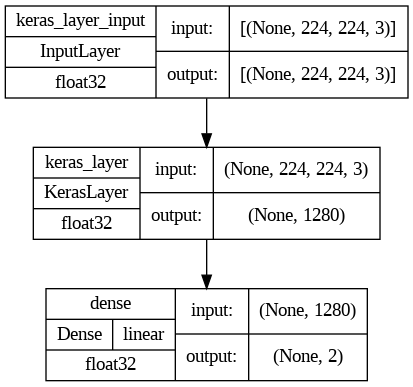

In [48]:

tf.keras.utils.plot_model(model=model,
                          show_shapes=True,
                          show_dtype=True,
                          expand_nested=True,
                          show_layer_activations=True)

In [49]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [50]:
history = model.fit(x=X_train_scaled, y=y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.2286 - accuracy: 0.9000
Epoch 2/5
50/50 [==============================] - 54s 1s/step - loss: 0.0706 - accuracy: 0.9781
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.0539 - accuracy: 0.9831
Epoch 4/5
50/50 [==============================] - 54s 1s/step - loss: 0.0416 - accuracy: 0.9875
Epoch 5/5
50/50 [==============================] - 53s 1s/step - loss: 0.0337 - accuracy: 0.9912


In [51]:
score, accuracy = model.evaluate(x=X_test_scaled, y=y_test)

print('Test Loss =', score)

print('Test Accuracy =', accuracy)

13/13 [==============================] - 14s 962ms/step - loss: 0.0440 - accuracy: 0.9875
Test Loss = 0.04399722442030907
Test Accuracy = 0.987500011920929


In [55]:
history.history

{'loss': [0.22862963378429413,
  0.07061650604009628,
  0.05388239771127701,
  0.04157846048474312,
  0.033694010227918625],
 'accuracy': [0.8999999761581421,
  0.9781249761581421,
  0.9831249713897705,
  0.987500011920929,
  0.9912499785423279]}

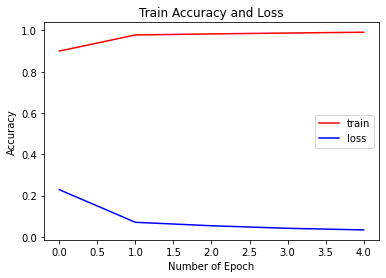

In [56]:
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['loss'], color='blue', label='loss')
plt.title(label="Train Accuracy and Loss")
plt.xlabel(xlabel="Number of Epoch")
plt.ylabel(ylabel="Accuracy")
plt.legend()
plt.show()

Path of the image to be predicted: /content/resized_image/cat.660.jpg


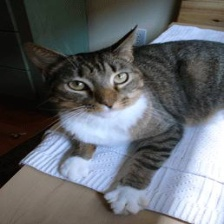

1/1 [==============================] - 1s 764ms/step
[[ 3.9573784 -4.610072 ]]
0
The image represents a Cat


In [59]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(src=input_image, dsize=(224,224))

input_image_scaled = input_image_resize / 255

image_reshaped = np.reshape(a=input_image_scaled, newshape=(1,224,224,3))

input_prediction = model.predict(x=image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

# '/content/resized_image/cat.660.jpg'

In [60]:
# Model accuracy: 0.9912